<a href="https://colab.research.google.com/github/wandieinnocents/sales_analysis_pyhon_thesis_v3/blob/main/v3_A_MULTIMODAL_ML_FRAMEWORK_FOR_BUSINESS_PERFORMANCE_ANALYSIS_Research_progress_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BUSINESS  PERFORMANCE ANALYSIS

In this research, I utilize The Supermart Grocery Sales - Retail Analytics Dataset  to evaluate and respond to business queries regarding sales data for a duration of 4 years of operation (2015 - 2018). The dataset contains data on orders placed by customers using a grocery delivery application in the state of Tamil Nadu, India.

The dataset is a useful resource also for understanding consumer behavior in the grocery retail industry, and for developing insights into the factors that drive sales in this sector. By analyzing the dataset, businesses can be able to  identify patterns, trends, and correlations that can help retailers optimize their marketing, pricing, and product strategies to increase sales and revenue and also to knkow which region to focus on most.

##TABLE OF CONTENTS

1.   Y:Data loading
2.   Y:Cleaning null values
3.   Y:What Product Category sold the most for all the 3 years?
4.   Y:What Product Sub Category sold the most for all the 3 years?
5.   Y:Which city had the highest number of sales
6.   Total number of sales to per customer
7.   Total number of sales by region
8.   Total sales per state
9.   Total profits per region
10.  Total profits per city
11.   Total profits per state
11.   Total profits per category
11.   Total profits per subcategory
12.   Total  number of sales per year
13.   Total  number of profits per year




In [521]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import os


In [522]:

# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [523]:
# read the dataset for supermarket sales
df = pd.read_csv("/content/drive/MyDrive/research1/supermarket_grocery_sales.csv")

In [524]:
# display the dataset
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


CHECKING AND CLEANING OF NULL VALUES

In [525]:
# Checking for null values using isnull()
print(df.isnull())

      Order ID  Customer Name  Category  Sub Category   City  Order Date  \
0        False          False     False         False  False       False   
1        False          False     False         False  False       False   
2        False          False     False         False  False       False   
3        False          False     False         False  False       False   
4        False          False     False         False  False       False   
...        ...            ...       ...           ...    ...         ...   
9989     False          False     False         False  False       False   
9990     False          False     False         False  False       False   
9991     False          False     False         False  False       False   
9992     False          False     False         False  False       False   
9993     False          False     False         False  False       False   

      Region  Sales  Discount  Profit  State  
0      False  False     False   False  F

In [526]:
# count the number of null values if exists
print(df.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [527]:
# remove all the null values from dataset if exists
df=df.dropna(how='all')

CLEANED DATASET

In [528]:
# cleaned dataset
df.head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.27,484.65,Tamil Nadu


##BUSINESS PERFORMANCE  ANALYSIS FOR ALL THE 3 YEARS (COMBINED)

#What Product Category sold the most for all the 3 years?


In [529]:
product_category = df.groupby('Category')

# product - category, quantiy orderd : sales
#Visualizing
product_category_sales = product_category.sum()['Sales']
product_category_sales

<ipython-input-529-1dea33b07a57>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_category_sales = product_category.sum()['Sales']


Category
Bakery               2112281
Beverages            2085313
Eggs, Meat & Fish    2267401
Food Grains          2115272
Fruits & Veggies     2100727
Oil & Masala         2038442
Snacks               2237546
Name: Sales, dtype: int64

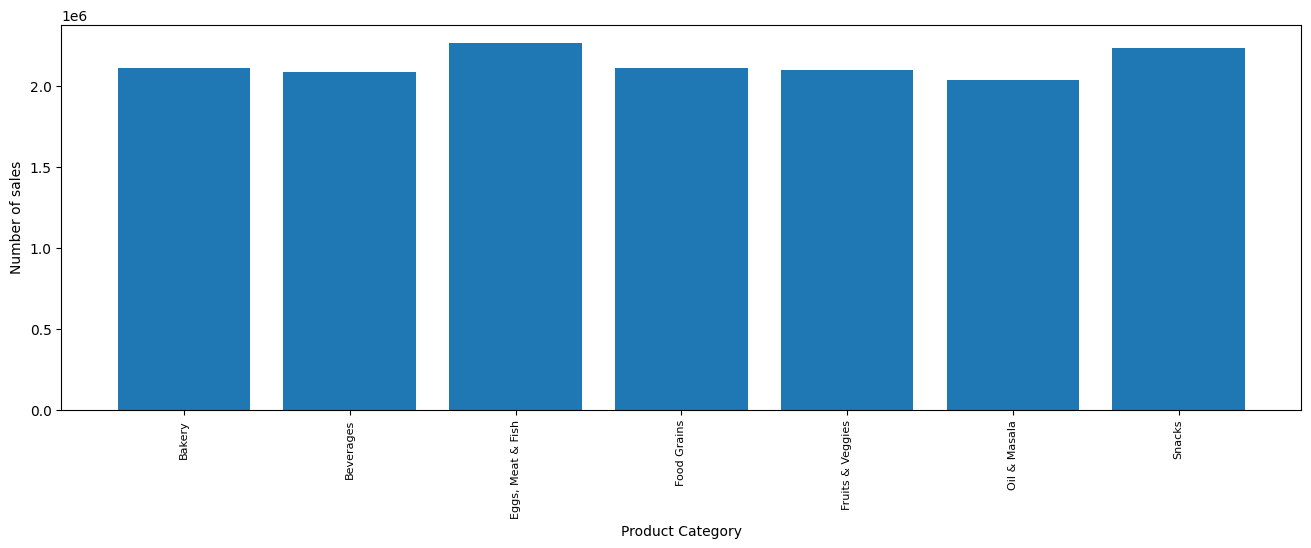

In [584]:
# vizualizing the dataset for product sales
products = [product for product, df in product_category]

plt.figure(figsize=(16,5))
plt.bar(products, product_category_sales)
plt.ylabel('Number of sales')
plt.xlabel('Product Category')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

#What Product Sub category Category sold the most for all the 3 years?


In [531]:
# product sub category which sold most for all 3 years
product_sub_category = df.groupby('Sub Category')
product_sub_category_sales = product_sub_category.sum()['Sales']
product_sub_category_sales

<ipython-input-531-996f854eb551>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_sub_category_sales = product_sub_category.sum()['Sales']


Sub Category
Atta & Flour           534649
Biscuits               684083
Breads & Buns          742586
Cakes                  685612
Chicken                520497
Chocolates             733898
Cookies                768213
Dals & Pulses          523371
Edible Oil & Ghee      668086
Eggs                   575156
Fish                   560548
Fresh Fruits           551212
Fresh Vegetables       525842
Health Drinks         1051439
Masalas                697480
Mutton                 611200
Noodles                735435
Organic Fruits         503402
Organic Staples        558929
Organic Vegetables     520271
Rice                   498323
Soft Drinks           1033874
Spices                 672876
Name: Sales, dtype: int64

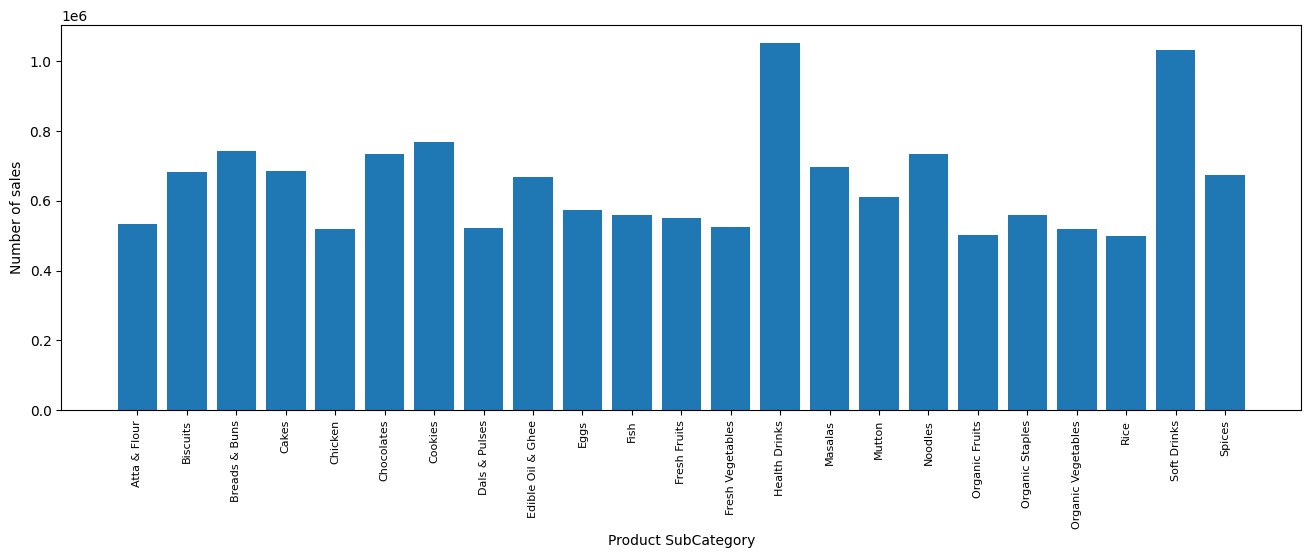

In [583]:
# vizualizing the product sub category sales

products_subcat = [product for product, df in product_sub_category]

# bar plot
plt.figure(figsize=(16,5))
plt.bar(products_subcat, product_sub_category_sales)
plt.ylabel('Number of sales')
plt.xlabel('Product SubCategory')
plt.xticks(products_subcat, rotation='vertical', size=8)
plt.show()

#WHICH CITY HAD THE HIGHEST NUMBER OF SALES


In [533]:
# city sales analysis for all 3 years
city = df.groupby('City')
city_sales = city.sum()['Sales']
city_sales

<ipython-input-533-9973ec438147>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_sales = city.sum()['Sales']


City
Bodi              667177
Chennai           634963
Coimbatore        634748
Cumbum            626047
Dharmapuri        571553
Dindigul          575631
Kanyakumari       706764
Karur             642273
Krishnagiri       637273
Madurai           617836
Nagercoil         551435
Namakkal          598530
Ooty              599292
Perambalur        659738
Pudukottai        653179
Ramanadhapuram    634386
Salem             657093
Tenkasi           643652
Theni             579553
Tirunelveli       659812
Trichy            541403
Vellore           676550
Viluppuram        581274
Virudhunagar      606820
Name: Sales, dtype: int64

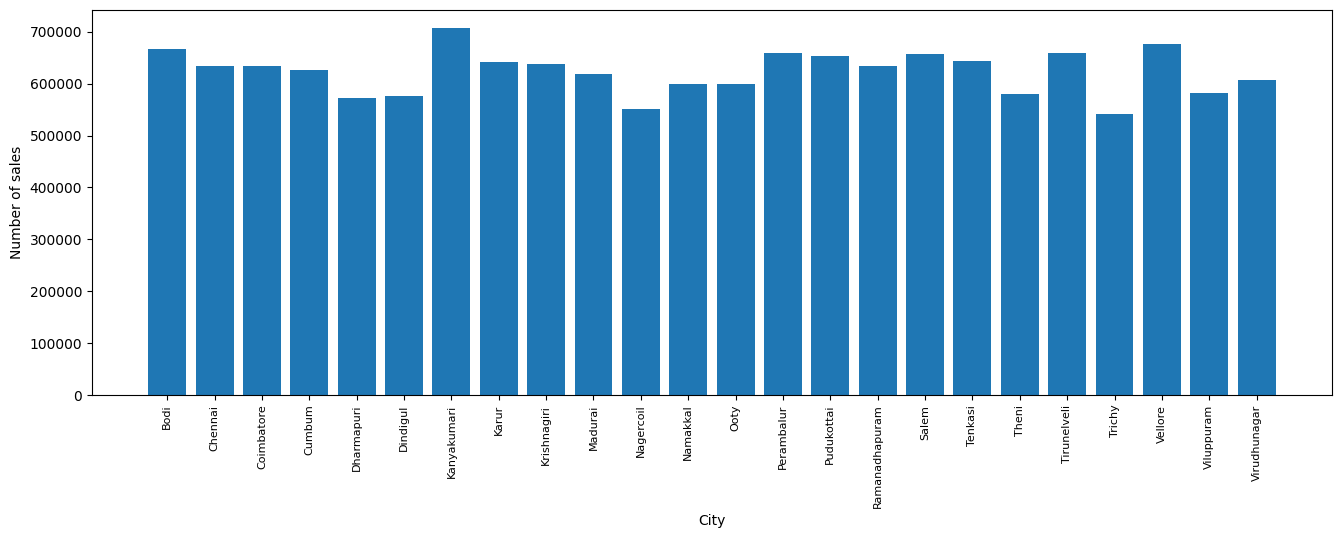

In [582]:
# vizualizing the city sales data for the 3 years

city_sales_analysis = [product for product, df in city]

# bar plot
plt.figure(figsize=(16,5))
plt.bar(city_sales_analysis, city_sales)
plt.ylabel('Number of sales')
plt.xlabel('City')
plt.xticks(city_sales_analysis, rotation='vertical', size=8)
plt.show()

##Total number of purchases / sales to per customer

In [535]:
# Total number of sales to per customer
customers = df.groupby('Customer Name')
customer_sales = customers.sum()['Sales']
customer_sales


<ipython-input-535-460aea406f29>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer_sales = customers.sum()['Sales']


Customer Name
Adavan      315341
Aditi       299674
Akash       307488
Alan        294397
Amrish      333351
Amy         301558
Anu         283735
Arutra      325720
Arvind      293802
Esther      283656
Ganesh      278349
Hafiz       251965
Harish      293839
Haseena     298924
Hussain     307337
Jackson     271793
James       305915
Jonas       293489
Komal       295671
Krithika    334361
Kumar       262623
Malik       290884
Mathew      308376
Muneer      311553
Peer        307026
Ram         295338
Ramesh      292087
Ravi        305591
Ridhesh     309639
Roshan      298463
Rumaiza     284534
Sabeela     288230
Shah        318588
Sharon      289486
Sheeba      308720
Shree       292566
Sudeep      309196
Sudha       273493
Sundar      287151
Suresh      315973
Surya       312645
Veena       299160
Verma       331665
Veronica    301611
Vidya       321798
Vince       284536
Vinne       319565
Willams     293597
Yadav       273162
Yusuf       299361
Name: Sales, dtype: int64

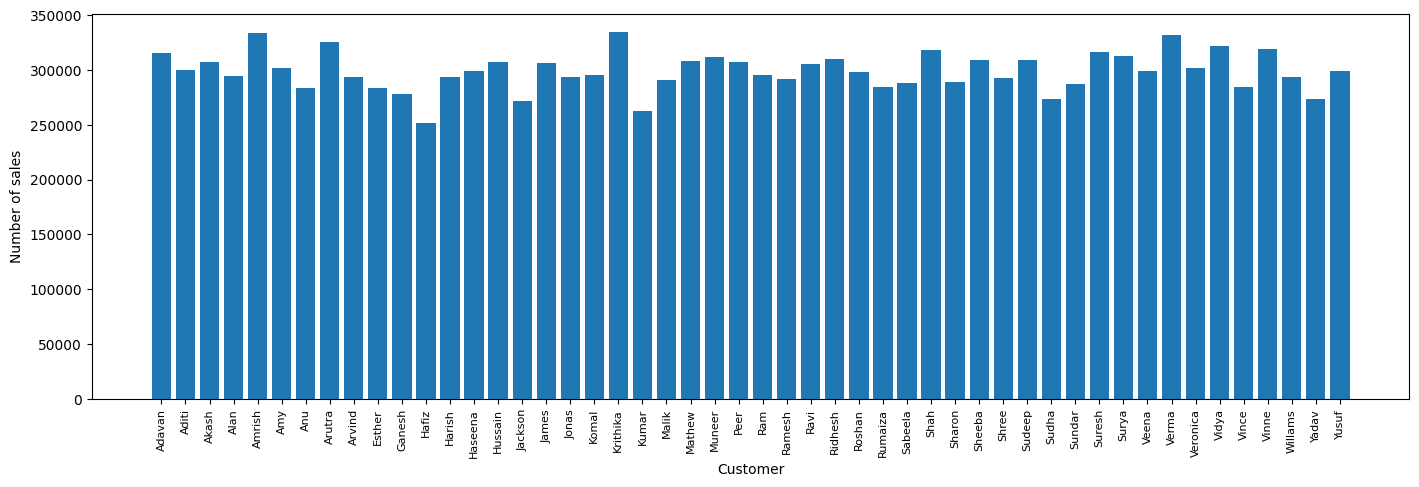

In [581]:
# vizualizing Total number of sales to per customer

customer_sales_analysis = [product for product, df in customers]

# bar plot
plt.figure(figsize=(17,5))
plt.bar(customer_sales_analysis, customer_sales)
plt.ylabel('Number of sales')
plt.xlabel('Customer')
plt.xticks(customer_sales_analysis, rotation='vertical', size=8)
# bar width
plt.show()

##Total number of sales by region

In [537]:
# sales analysis by region
regions = df.groupby('Region')
region_sales = regions.sum()['Sales']
region_sales


<ipython-input-537-7032e750793f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_sales = regions.sum()['Sales']


Region
Central    3468156
East       4248368
North         1254
South      2440461
West       4798743
Name: Sales, dtype: int64

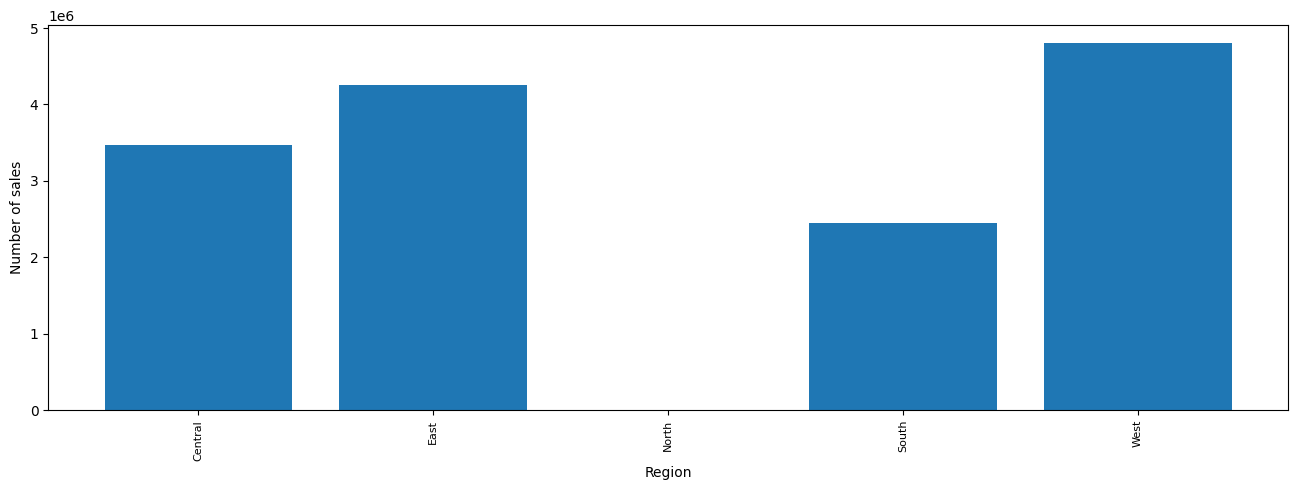

In [579]:
# vizualizing sales analysis by region

region_sales_analysis = [product for product, df in regions]

# bar plot
plt.figure(figsize=(16,5))
plt.bar(region_sales_analysis, region_sales)
plt.ylabel('Number of sales')
plt.xlabel('Region')
plt.xticks(region_sales_analysis, rotation='vertical', size=8)
# bar width
plt.show()

##Sales analysis by state

In [539]:
# sales analysis by state
states = df.groupby('State')
states_sales = states.sum()['Sales']
states_sales

<ipython-input-539-7d37d4699a62>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  states_sales = states.sum()['Sales']


State
Tamil Nadu    14956982
Name: Sales, dtype: int64

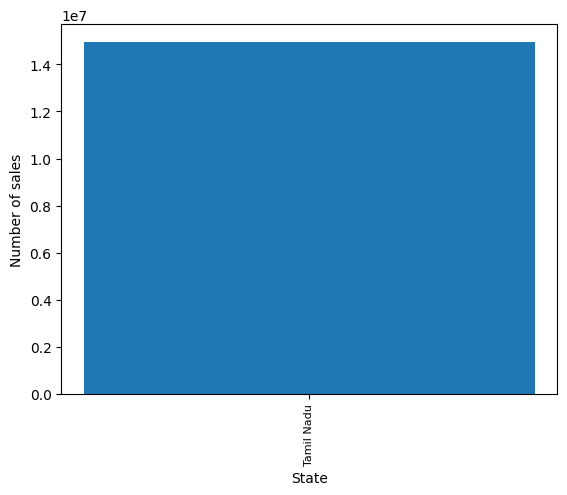

In [540]:
# vizualizing sales analysis by state

states_sales_analysis = [product for product, df in states]

# bar plot
plt.bar(states_sales_analysis, states_sales)
plt.ylabel('Number of sales')
plt.xlabel('State')
plt.xticks(states_sales_analysis, rotation='vertical', size=8)
# bar width
plt.show()

##PROFITS ANALYSIS FOR ALL THE 4 YEARS

##Total profits per region

In [541]:
# profit analysis by region
regions_filter = df.groupby('Region')
regions_filter_profits = regions_filter.sum()['Profit']
regions_filter_profits

<ipython-input-541-6858f55f2938>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regions_filter_profits = regions_filter.sum()['Profit']


Region
Central     856806.84
East       1074345.58
North          401.28
South       623562.89
West       1192004.61
Name: Profit, dtype: float64

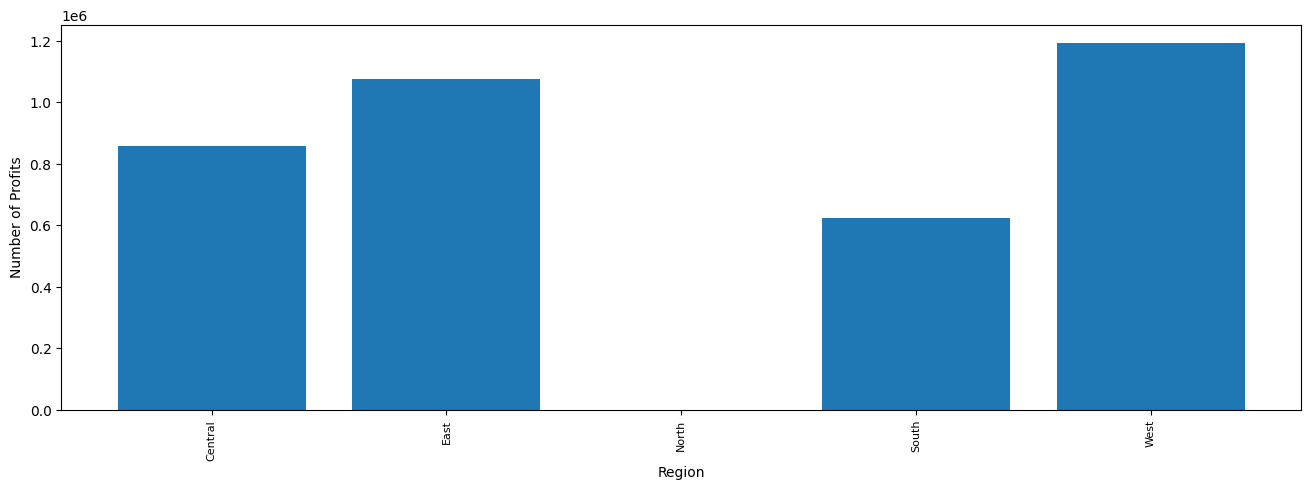

In [577]:
# profit analysis by region

regions_filter_profits_analysis = [product for product, df in regions_filter]

# bar plot
plt.figure(figsize=(16,5))
plt.bar(regions_filter_profits_analysis, regions_filter_profits)
plt.ylabel('Number of Profits')
plt.xlabel('Region')
plt.xticks(regions_filter_profits_analysis, rotation='vertical', size=8)
# bar width
plt.show()

## Total profits analysis per city

In [543]:
# profit analysis by city
cities_filter = df.groupby('City')
cities_filter_profits = cities_filter.sum()['Profit']
cities_filter_profits

<ipython-input-543-b596681e7548>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cities_filter_profits = cities_filter.sum()['Profit']


City
Bodi              173655.13
Chennai           160921.33
Coimbatore        157399.41
Cumbum            156355.13
Dharmapuri        141593.05
Dindigul          144872.95
Kanyakumari       172217.74
Karur             169305.94
Krishnagiri       160477.48
Madurai           152548.61
Nagercoil         137848.47
Namakkal          145502.10
Ooty              150078.92
Perambalur        171132.19
Pudukottai        164072.63
Ramanadhapuram    158951.03
Salem             160899.30
Tenkasi           156230.72
Theni             142739.78
Tirunelveli       165169.01
Trichy            136059.94
Vellore           174073.01
Viluppuram        144200.64
Virudhunagar      150816.69
Name: Profit, dtype: float64

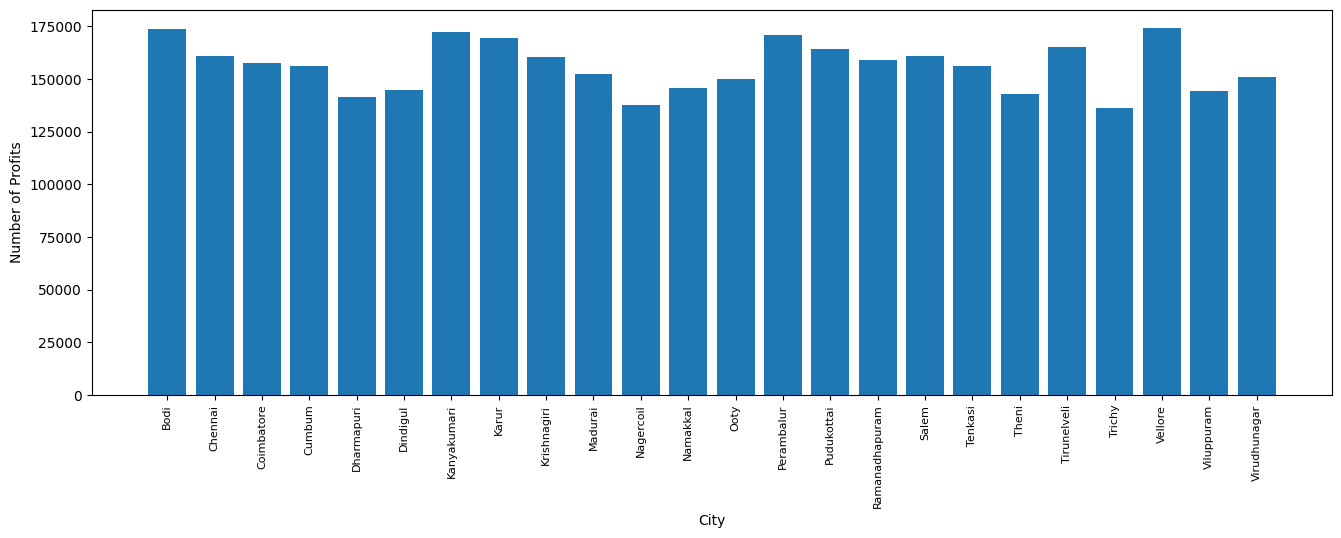

In [576]:
# profit analysis by city

city_filter_profits_analysis = [product for product, df in cities_filter]

# bar plot
plt.figure(figsize=(16,5))
plt.bar(city_filter_profits_analysis, cities_filter_profits)
plt.ylabel('Total Profits')
plt.xlabel('City')
plt.xticks(city_filter_profits_analysis, rotation='vertical', size=8)
# bar width
plt.show()

##Total profits analysis per state

In [545]:
# profit analysis by state
states_filter = df.groupby('State')
states_filter_profits = states_filter.sum()['Profit']
states_filter_profits

<ipython-input-545-ee40a38bfa27>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  states_filter_profits = states_filter.sum()['Profit']


State
Tamil Nadu    3747121.2
Name: Profit, dtype: float64

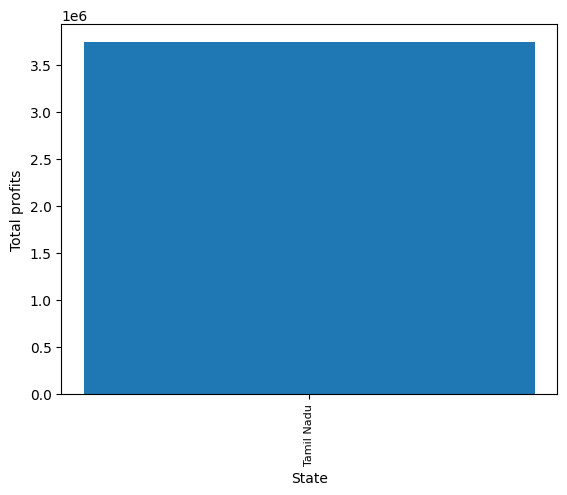

In [546]:
# profit analysis by state

state_filter_profits_analysis = [product for product, df in states_filter]

# bar plot
plt.bar(state_filter_profits_analysis, states_filter_profits)
plt.ylabel('Total profits')
plt.xlabel('State')
plt.xticks(state_filter_profits_analysis, rotation='vertical', size=8)
# bar width
plt.show()

##Total profits per product category

In [547]:
# profit analysis by category
category_filter = df.groupby('Category')
category_filter_profits = category_filter.sum()['Profit']
category_filter_profits

<ipython-input-547-16528dbd8ebb>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_filter_profits = category_filter.sum()['Profit']


Category
Bakery               528521.06
Beverages            525605.76
Eggs, Meat & Fish    567357.22
Food Grains          529162.64
Fruits & Veggies     530400.38
Oil & Masala         497895.29
Snacks               568178.85
Name: Profit, dtype: float64

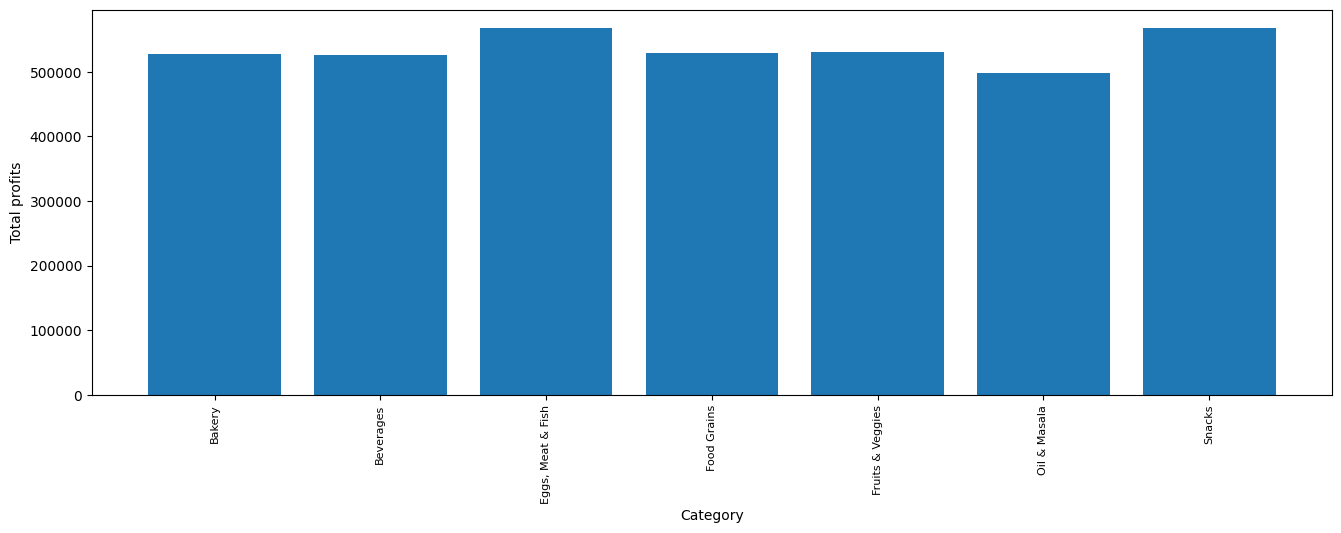

In [575]:
# profit analysis by product category

category_filter_profits_analysis = [product for product, df in category_filter]

# bar plot
plt.figure(figsize=(16,5))
plt.bar(category_filter_profits_analysis, category_filter_profits)
plt.ylabel('Total profits')
plt.xlabel('Category')
plt.xticks(category_filter_profits_analysis, rotation='vertical', size=8)
# bar width
plt.show()

##Total profits per Sub category

In [549]:


# profit analysis by Sub category
sub_category_filter = df.groupby('Sub Category')
sub_category_filter_profits = sub_category_filter.sum()['Profit']
sub_category_filter_profits

<ipython-input-549-56102f20ebd1>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub_category_filter_profits = sub_category_filter.sum()['Profit']


Sub Category
Atta & Flour          127861.10
Biscuits              169357.62
Breads & Buns         190764.98
Cakes                 168398.46
Chicken               124049.89
Chocolates            183849.34
Cookies               190643.70
Dals & Pulses         130232.29
Edible Oil & Ghee     168593.58
Eggs                  144669.92
Fish                  147248.01
Fresh Fruits          134668.35
Fresh Vegetables      131273.33
Health Drinks         267469.79
Masalas               168999.11
Mutton                151389.40
Noodles               193685.81
Organic Fruits        130862.33
Organic Staples       144136.89
Organic Vegetables    133596.37
Rice                  126932.36
Soft Drinks           258135.97
Spices                160302.60
Name: Profit, dtype: float64

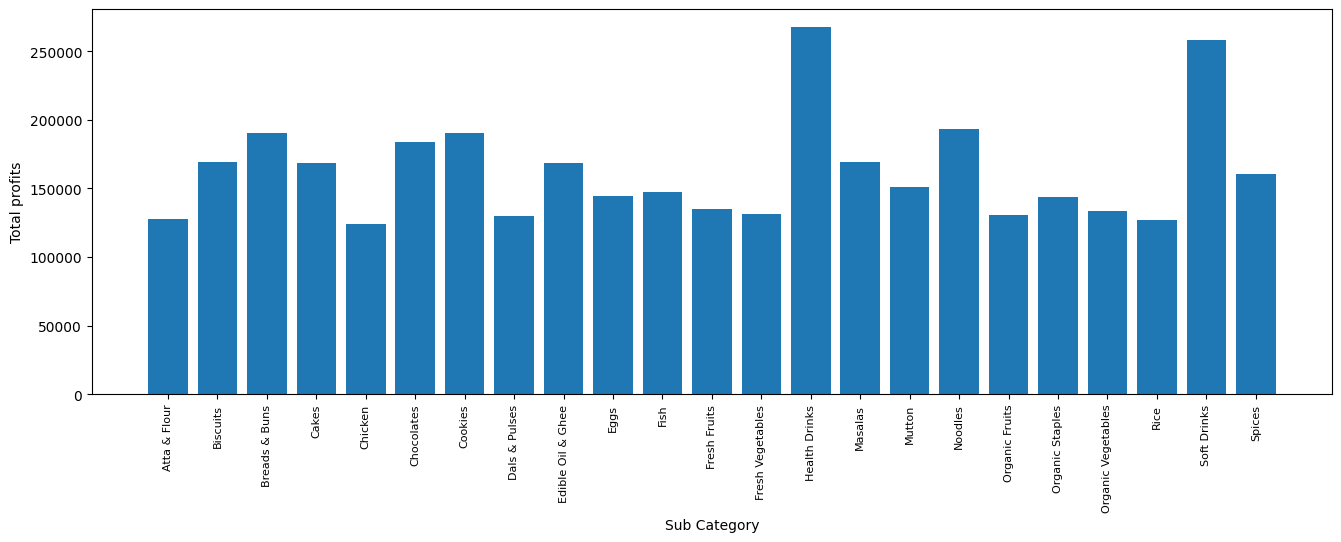

In [574]:
# profit analysis by product subcategory

sub_category_filter_profits_analysis = [product for product, df in sub_category_filter]

# bar plot
plt.figure(figsize=(16,5))
plt.bar(sub_category_filter_profits_analysis, sub_category_filter_profits)
plt.ylabel('Total profits')
plt.xlabel('Sub Category')
plt.xticks(sub_category_filter_profits_analysis, rotation='vertical', size=8)
# bar width
plt.show()

##BUSINESS PERFORMANCE ANALYSIS ANNUALLY

Create a new dataset that shows the year column for annual business analysis

In [551]:
# general dataframe
df.head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


Add the year column to the dataframe

In [552]:
# dataframe with year column

# convert the Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
# add a column for Year
df['Year'] = df['Order Date'].dt.year

# print the dataframe
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,Tamil Nadu,2015
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu,2015
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu,2017
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,Tamil Nadu,2018


Add the Month column to the dataframe

In [553]:
# dataframe with month column

# convert the Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
# add a column for Year
df['Month'] = df['Order Date'].dt.month

# print the dataframe
df.head(150)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Year,Month
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,2017,11
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,2017,11
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,2017,6
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,2016,10
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,2016,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,OD146,Malik,Oil & Masala,Edible Oil & Ghee,Coimbatore,2016-09-07,West,1551,0.13,573.87,Tamil Nadu,2016,9
146,OD147,Ridhesh,Food Grains,Organic Staples,Theni,2015-10-22,East,1564,0.27,187.68,Tamil Nadu,2015,10
147,OD148,Harish,Fruits & Veggies,Fresh Vegetables,Tirunelveli,2017-12-05,Central,1125,0.33,292.50,Tamil Nadu,2017,12
148,OD149,Veronica,Beverages,Health Drinks,Tenkasi,2017-12-05,Central,768,0.10,184.32,Tamil Nadu,2017,12


##Add the Month_Year column to the dataframe

The month year column, will have the exact month when an order was purchased , and the year in which the product was purchased, it will be used in assessing the business on a montly basis.

In [554]:
# dataframe with monthYear column

# convert the Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Use datetime.to_period() method to extract month and year
# df['Month_Year'] = df['Order Date'].dt.to_period('M')


# Use DataFrame.apply() with lambda function and strftime()
df['Month_Year'] = df['Order Date'].apply(lambda x: x.strftime('%B-%Y'))
# print(df)

df


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Year,Month,Month_Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,2017,11,November-2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,2017,11,November-2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,2017,6,June-2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,2016,10,October-2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,2016,10,October-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,Tamil Nadu,2015,12,December-2015
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu,2015,7,July-2015
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu,2017,6,June-2017
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,Tamil Nadu,2018,10,October-2018


##Sales performance analysis per year


In [555]:
# sales analysis per year
year_filter_sales = df.groupby('Year')
year_filter_filter_sales = year_filter_sales.sum()['Sales']
year_filter_filter_sales


<ipython-input-555-50acdb05bc43>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_filter_filter_sales = year_filter_sales.sum()['Sales']


Year
2015    2975599
2016    3131959
2017    3871912
2018    4977512
Name: Sales, dtype: int64

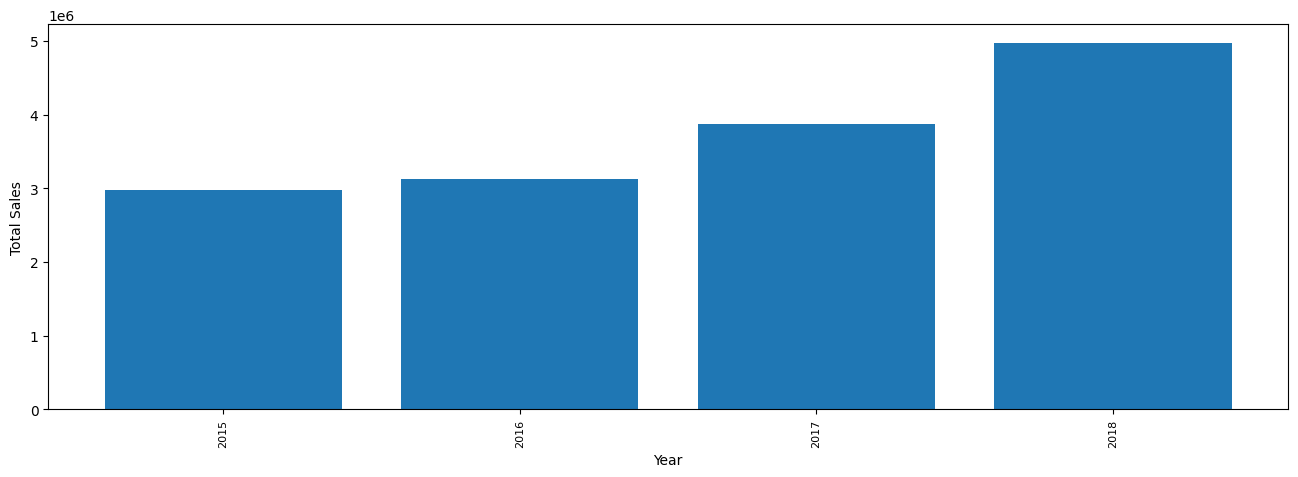

In [573]:
# sales analysis per year plot

year_filter_sales_analysis = [product for product, df in year_filter_sales]

# bar plot
plt.figure(figsize=(16,5))
plt.bar(year_filter_sales_analysis, year_filter_filter_sales)
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.xticks(year_filter_sales_analysis, rotation='vertical', size=8)
# bar width
plt.show()

##Profits analysis  per year

In [557]:
# profit analysis per year
year_filter_profits = df.groupby('Year')
year_filter_filter_profits = year_filter_profits.sum()['Profit']
year_filter_filter_profits


<ipython-input-557-f29af06f424d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_filter_filter_profits = year_filter_profits.sum()['Profit']


Year
2015     752529.11
2016     797192.99
2017     953216.22
2018    1244182.88
Name: Profit, dtype: float64

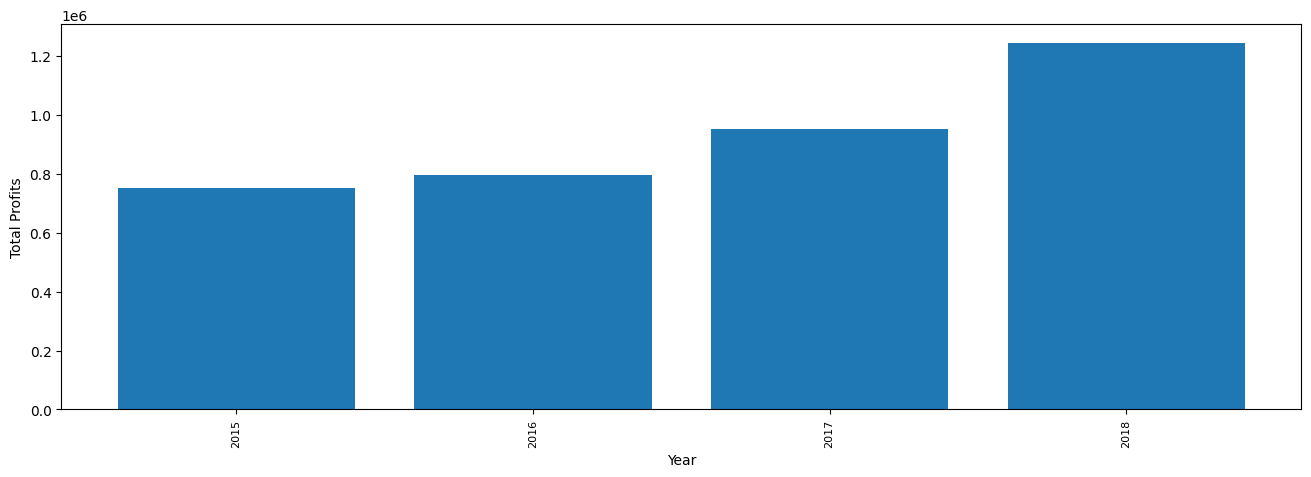

In [572]:
# profit analysis per year plot

year_filter_profit_analysis = [product for product, df in year_filter_profits]

# bar plot.
plt.figure(figsize=(16,5))
plt.bar(year_filter_profit_analysis, year_filter_filter_profits)
plt.ylabel('Total Profits')
plt.xlabel('Year')
plt.xticks(year_filter_profit_analysis, rotation='vertical', size=8)
# bar width
plt.show()

##Total  number of sales per Month (of year)


In [559]:


# ## analysis per month of year
month_year_filter_sales = df.groupby('Month_Year')
month_year_sales_filter = month_year_filter_sales.sum()['Sales']
month_year_sales_filter

<ipython-input-559-9b53fe44f565>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_year_sales_filter = month_year_filter_sales.sum()['Sales']


Month_Year
April-2015        203258
April-2016        237272
April-2017        247773
April-2018        310150
August-2015       230161
August-2016       229543
August-2017       256089
August-2018       331014
December-2015     410279
December-2016     472245
December-2017     518307
December-2018     687245
February-2015      66030
February-2016      90823
February-2017     132982
February-2018     166267
January-2015      122497
January-2016       89009
January-2017      131727
January-2018      234739
July-2015         220986
July-2016         215776
July-2017         315531
July-2018         337092
June-2015         206064
June-2016         205388
June-2017         291454
June-2018         354902
March-2015        247156
March-2016        212164
March-2017        238956
March-2018        355704
May-2015          164263
May-2016          222722
May-2017          332524
May-2018          367411
November-2015     480979
November-2016     477720
November-2017     551815
November-2018 

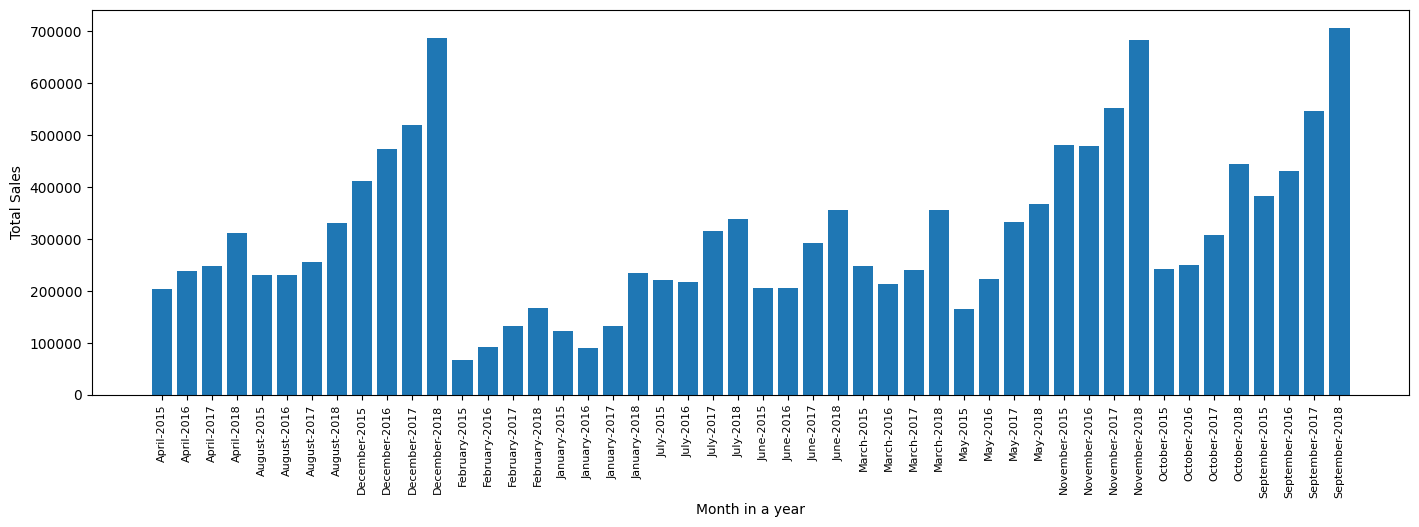

In [585]:
# profit analysis per year plot

month_year_filter_sales_analysis = [product for product, df in month_year_filter_sales]

# bar plot
# size: width,height
plt.figure(figsize=(17,5))
plt.bar(month_year_filter_sales_analysis, month_year_sales_filter)
# plt.figure(figsize=(10, 6))
plt.ylabel('Total Sales')
plt.xlabel('Month in a year')
plt.xticks(month_year_filter_sales_analysis, rotation='vertical', size=8 )
# bar width
plt.show()

##Total  number of profits per Month (of year)


In [561]:
# ##Total  number of sales per Month (of year)


##MOST SELLING PRODUCT BUSINESS PERFORMANCE ANALYSIS
This is the product that will be used in doing predictions and model

## Create a new dataset with the  highest selling product from the sales ,that shall be used to handle the predictions, do some analysis on the product , and also make the predictions using that product, that product should be the one used to do the model predictions